1.) Vinted Database Setup

In [3]:
import pandas as pd
import glob, os, json
import wget

In [18]:
#just for getting an understanding how one JSON file is build up
json_1 = json.load(open("/Users/lukasbauerschmidt/Desktop/TechLab/3. Project/3. Code/wt21-fash-un-capsule-wardrobe/AI/out/1.json"))
json_1["items"]

[{'id': 1534123352,
  'title': 'Cute Outfit Set',
  'brand_id': 131824,
  'size_id': 4,
  'status_id': 2,
  'disposal_conditions': 6,
  'user_id': 77643561,
  'owner_id': None,
  'country_id': 14,
  'catalog_id': 18,
  'color1_id': 15,
  'color2_id': None,
  'package_size_id': 1,
  'is_hidden': 0,
  'is_reserved': 0,
  'reserved_for_user_id': None,
  'is_visible': 1,
  'is_unisex': 0,
  'is_closed': 0,
  'is_admin_alerted': False,
  'active_bid_count': 0,
  'favourite_count': 0,
  'view_count': 1,
  'moderation_status': 0,
  'last_push_up_at': '2022-01-06T10:22:40-07:00',
  'description': 'worn once\nsizeS\nstretchy',
  'package_size_standard': True,
  'item_closing_action': None,
  'related_catalog_ids': [],
  'related_catalogs_enabled': False,
  'size': '6 / S',
  'brand': 'Nobrand',
  'composition': '',
  'extra_conditions': '',
  'is_for_sell': True,
  'is_for_swap': True,
  'is_for_give_away': False,
  'is_handicraft': False,
  'is_draft': False,
  'label': 'Nobrand',
  'real_valu

In [2]:
pip install wget

  Using cached wget-3.2.zip (10 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=3cf072f22496e96e27f22298a3f4975899661e6744ad9014add1eb33d5eb7fd9
  Stored in directory: /Users/lukasbauerschmidt/Library/Caches/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
Note: you may need to restart the kernel to use updated packages.


In [4]:
#to be done (@Fabian): get the updated scraped vinted dataset of Max and replace it in the glob("/Users/lukasbauerschmidt/Desktop/TechLab/3. Project/3. Code/wt21-fash-un-capsule-wardrobe/AI/out/*.json")
#result: updated "benchmark"-dictio
import os
from glob import glob
import urllib.request

dictio={}
counter=0
for f_name in glob("/Users/lukasbauerschmidt/Desktop/TechLab/3. Project/3. Code/wt21-fash-un-capsule-wardrobe/AI/out/*.json"):
    for i,item in enumerate(json.load(open(f_name))["items"]):
        counter+=1
        dictio["{}.jpeg".format(counter)]=[{"image": json.load(open(f_name))["items"][i]["photos"][0]["full_size_url"], 
                          "website-url": "https://www.vinted.de{}".format(json.load(open(f_name))["items"][i]["path"]),
                          "price": json.load(open(f_name))["items"][i]["price"],
                          "user name": json.load(open(f_name))["items"][i]["user"]["login"],
                          "title": json.load(open(f_name))["items"][i]["title"]}]
        

dictio

{'1.jpeg': [{'image': 'https://images.vinted.net/t/03_00cf6_VcEwGpEzmaeEGyAKesJWcs1t/1641447461.jpeg?s=e00f59500f8ad1f5ecce44cb49f18a5407e41217',
   'website-url': 'https://www.vinted.de/women/clothes/activewear/tops-and-t-shirts/1544170641-columbia-dry-wicking-tank',
   'price': '$3.00',
   'user name': 'aliza_dutt',
   'title': 'Columbia Dry-Wicking Tank'}],
 '2.jpeg': [{'image': 'https://images.vinted.net/t/03_005e3_j4wBQpXxbdFcbjHTbdGQVr5W/1641447443.jpeg?s=ed17b1420e34be409eaf01f285d32ab491570f64',
   'website-url': 'https://www.vinted.de/women/clothes/tops-and-t-shirts/t-shirts/1544170607-lularoe-tween-xxs-classic-outfit-nwt',
   'price': '$27.00',
   'user name': 'bernicelyle',
   'title': 'Lularoe Tween XXS Classic Outfit NWT'}],
 '3.jpeg': [{'image': 'https://images.vinted.net/t/03_0242d_cB7gu5mSWv5bxLypP2ofN6qb/1641447443.jpeg?s=59807baff8e9a8895b87cb5c59f5980be2b2c485',
   'website-url': 'https://www.vinted.de/women/clothes/dresses/midi-dresses/1544170606-mimi-maternity-flor

In [14]:
#to be done (@Fabian): download the images of previously build dictio locally (this is so far the only way the DocArray library can "benchmark" pictures). Put your own path here
#threw an error while downloading the old dataset since some pictures were taken from website in the meantime
for i in list(dictio.keys()):
        
        wget.download(dictio[i][0]["image"], out="/Users/lukasbauerschmidt/Desktop/TechLab/3. Project/3. Code/wt21-fash-un-capsule-wardrobe/AI/Scrape/{}.jpeg".format(i))
        


  0% [                                                                            ]      0 / 580420
  1% [.                                                                           ]   8192 / 580420
  2% [..                                                                          ]  16384 / 580420
  4% [...                                                                         ]  24576 / 580420
  5% [....                                                                        ]  32768 / 580420
  7% [.....                                                                       ]  40960 / 580420
  8% [......                                                                      ]  49152 / 580420
  9% [.......                                                                     ]  57344 / 580420
 11% [........                                                                    ]  65536 / 580420
 12% [.........                                                                   ]  73728 / 580420

100% [............................................................................] 494857 / 494857

HTTPError: HTTP Error 404: Not Found

2.) AI Model

In [ ]:
pip install "docarray[full]"

In [ ]:
pip install matplotlib pillow

In [ ]:
pip install uvicorn

In [ ]:
pip install fastapi

In [9]:
from docarray import DocumentArray

left_da = DocumentArray.from_files("/Users/lukasbauerschmidt/Desktop/TechLab/3. Project/3. Code/wt21-fash-un-capsule-wardrobe/AI/benchmark.jpg")

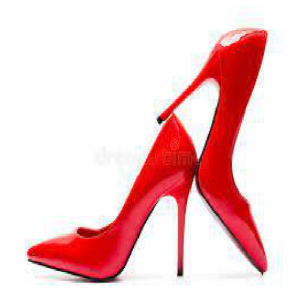

In [10]:
left_da.plot_image_sprites()

In [11]:
from docarray import Document

def preproc(d: Document):
    return (d.load_uri_to_image_tensor()  # load
            .set_image_tensor_shape(shape=(128, 128))
             .set_image_tensor_normalization()  # normalize color 
             .set_image_tensor_channel_axis(-1, 0))  # switch color axis for the pytorch model later

left_da.apply(preproc)

                       Documents Summary                       
                                                               
  Length                 1                                     
  Homogenous Documents   True                                  
  Common Attributes      ('id', 'tensor', 'mime_type', 'uri')  
                                                               
                      Attributes Summary                       
                                                               
  Attribute   Data type      #Unique values   Has empty value  
 ───────────────────────────────────────────────────────────── 
  id          ('str',)       1                False            
  mime_type   ('str',)       1                False            
  tensor      ('ndarray',)   1                False            
  uri         ('str',)       1                False

In [12]:
import torchvision
model = torchvision.models.resnet50(pretrained=True) # load ResNet50
left_da.embed(model)  # embed via GPU to speedup

                             Documents Summary                              
                                                                            
  Length                 1                                                  
  Homogenous Documents   True                                               
  Common Attributes      ('id', 'tensor', 'mime_type', 'uri', 'embedding')  
                                                                            
                      Attributes Summary                       
                                                               
  Attribute   Data type      #Unique values   Has empty value  
 ───────────────────────────────────────────────────────────── 
  embedding   ('Tensor',)    1                False            
  id          ('str',)       1                False            
  mime_type   ('str',)       1                False            
  tensor      ('str',)       1                False            
  uri         ('ndarray',)   1                False

In [16]:
right_da = (DocumentArray.from_files("/Users/lukasbauerschmidt/Desktop/TechLab/3. Project/3. Code/wt21-fash-un-capsule-wardrobe/AI/databaseNew/*.jpeg")
                         .apply(preproc)
                         .embed(model))

In [17]:
left_da.match(right_da, limit=4)

In [19]:
import os

matches = []
for d in left_da:
    for m in d.matches:
        print(d.uri, m.uri, m.scores['cosine'].value)
        matches.append(os.path.basename(m.uri))
matches


/Users/lukasbauerschmidt/Desktop/TechLab/3. Project/3. Code/wt21-fash-un-capsule-wardrobe/AI/benchmark.jpg /Users/lukasbauerschmidt/Desktop/TechLab/3. Project/3. Code/wt21-fash-un-capsule-wardrobe/AI/databaseNew/1846.jpeg 0.3141787
/Users/lukasbauerschmidt/Desktop/TechLab/3. Project/3. Code/wt21-fash-un-capsule-wardrobe/AI/benchmark.jpg /Users/lukasbauerschmidt/Desktop/TechLab/3. Project/3. Code/wt21-fash-un-capsule-wardrobe/AI/databaseNew/2345.jpeg 0.37526172
/Users/lukasbauerschmidt/Desktop/TechLab/3. Project/3. Code/wt21-fash-un-capsule-wardrobe/AI/benchmark.jpg /Users/lukasbauerschmidt/Desktop/TechLab/3. Project/3. Code/wt21-fash-un-capsule-wardrobe/AI/databaseNew/1169.jpeg 0.38511622
/Users/lukasbauerschmidt/Desktop/TechLab/3. Project/3. Code/wt21-fash-un-capsule-wardrobe/AI/benchmark.jpg /Users/lukasbauerschmidt/Desktop/TechLab/3. Project/3. Code/wt21-fash-un-capsule-wardrobe/AI/databaseNew/949.jpeg 0.39223868


['1846.jpeg', '2345.jpeg', '1169.jpeg', '949.jpeg']

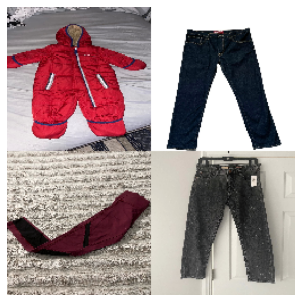

In [20]:
(DocumentArray(left_da[0].matches, copy=True)
    .apply(lambda d: d.set_image_tensor_channel_axis(0, -1)
                      .set_image_tensor_inv_normalization()).plot_image_sprites())

In [21]:
#to be done (@Fabian): one display the "01_00aa6_VkNfVoKuuGD5H5nDYjemZAE2.jpeg" part of matches and not the whole directory
matches

['1846.jpeg', '2345.jpeg', '1169.jpeg', '949.jpeg']

In [40]:
#matches_probe represent random sample matches
#matches_probe = [1,5,63,523]

In [23]:
#creates JSON file with matches. This file is then passed to the frontend
import json

dictio_matches={}
dictio = json.load(open("/Users/lukasbauerschmidt/Desktop/TechLab/3. Project/3. Code/wt21-fash-un-capsule-wardrobe/AI/databaseNew/dictio.json"))

for k in dictio.keys():
    for entry in matches:
        if k == entry:
            dictio_matches[k]=[dictio[k][0]]
#two options:
#first: dump json file in directory and FE accesses it via directory//put your own directory here
json.dump(dictio_matches, open("/Users/lukasbauerschmidt/Desktop/TechLab/3. Project/3. Code/wt21-fash-un-capsule-wardrobe/AI/dictio_matches.json", "w"))
#second: directly pass the file to FE without dropping it in directory
#choose option that FE prefers
json.dump(dictio_matches)

NameError: name 'json' is not defined

3.) Backend Application setup (probbably to be run as .py file in VS Code)

In [ ]:
#to be done (@Fabian): test this backend connection with insomnia/post-man

#pip install flask
#pip install "docarray[pip3full]"
#pip install matplotlib pillow
#pip install uvicorn
#pip install fastapi
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import io
import torchvision
from docarray import DocumentArray
from flask import Flask, render_template, request
from flask import send_file
from docarray import Document
import numpy as np
from matplotlib.figure import Figure
import base64
import os

#Setup of server
app = Flask(__name__)
model = torchvision.models.resnet50(pretrained=True) # load ResNet50
database_path = "/TechLab/3. Project/3. Code/wt21-fash-un-capsule-wardrobe/AI/database/*.jpeg"

#preproc() Function that is part of AI Model; outsourced of "predict"-function for easing purposes
def preproc(d: DocumentArray):
        return (d.load_uri_to_image_tensor()  # load
                .set_image_tensor_shape(shape=(128, 128))
                .set_image_tensor_normalization()  # normalize color 
                .set_image_tensor_channel_axis(-1, 0))

#Setup of Backend (Basically copy of the "AI Model" part of this notebook, but compressed into one function "predict()", so client can easily access it via API)
@app.route('/api/process-image', methods=['POST'])
def predict():
    imagefile = request.files['imagefile']
    image_path = "static/images/" + imagefile.filename
    imagefile.save(image_path)
    left_da = DocumentArray.from_files(image_path)
    left_da.apply(preproc)
    left_da.embed(model)

    right_da = DocumentArray.from_files(database_path)
    right_da.apply(preproc)
    right_da.embed(model)

    left_da.match(right_da, limit=4)

    matches = []
    for d in left_da:
        for m in d.matches:
            print(d.uri, m.uri, m.scores['cosine'].value)
            matches.append(m.uri)
    
    #extracts the 2x2 result matrix into one picture. Discussed with front end, that we do not display this 2x2 matrix but rather each picture individually (this is why this line is outcommented)
    #(DocumentArray(left_da[0].matches, copy=True).apply(lambda d: d.set_image_tensor_channel_axis(0, -1).set_image_tensor_inv_normalization()).plot_image_sprites(output='/TechLab/3. Project/3. Code/wt21-fash-un-capsule-wardrobe/AI/static/images/result.jpeg'))
    
    dictio_matches={}

    for k in dictio.keys():
        for entry in matches_probe:
            if k == entry:
                dictio_matches[k]=[dictio[k][0]]
    
    #two options:
    #first: dump json file in directory and FE accesses it via directory
    json.dump(dictio_matches, open("/Users/lukasbauerschmidt/Desktop/TechLab/3. Project/3. Code/wt21-fash-un-capsule-wardrobe/AI/dictio_matches.json", "w"))
    #second: directly pass the file to FE without dropping it in directory
    #choose option that FE prefers
    json.dump(dictio_matches)
    
    #option two
    return render_template(json.dump(dictio_matches))
    

    
if __name__ == "__main__":
    app.run(port=5000, debug=True) 
